### Get the pageviews of an article

In [13]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# import dataset
# Character metadata
char_md_cols = ['Wikipedia_movie_ID',
'Freebase_movie_ID',
'Movie_release_date',
'Character_name',
'Actor_date_of_birth',
'Actor_gender',
'Actor_height_(in_meters)',
'Actor_ethnicity_(Freebase_ID)',
'Actor_name',
'Actor_age_at_movie_release',
'Freebase_character/actor_map_ID',
'Freebase_character_ID',
'Freebase_actor_ID',
]
char_md = pd.read_csv('data/character.metadata.tsv', sep='\t', names=char_md_cols)
print('Number of characters:', char_md.shape[0])
char_md.head(2)

Number of characters: 450669


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.78,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4


In [15]:
# returns previous and next months timestamps for the wikipedia api
def timestamps_from_data(release_data):
    release_data = release_data.replace('-','')
    month = release_data[4:6]

    if month == '01':
        month_prev = '12'
        year_prev = "{:04d}".format(int(release_data[:4]) - 1)
    else: 
        month_prev = "{:02d}".format(int(month) - 1)
        year_prev = release_data[:4]
    first_timestamp = year_prev + month_prev + release_data[6:]
    
    if month == '12':
        month_next = '01'
        year_next = "{:04d}".format(int(release_data[:4]) + 1)
    else:
        month_next = "{:02d}".format(int(month) + 1)
        year_next = release_data[:4]
    second_timestamp = year_next + month_next + release_data[6:]

    return first_timestamp, second_timestamp


In [16]:
def pageviews(actor_name: str, first_timestamp: str, second_timestamp: str, granularity="monthly"):
    actor_name = actor_name.replace(' ', '_')

    url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/" + \
        actor_name + "/" + granularity + "/" + first_timestamp + "/" + second_timestamp
    
    response = requests.get(url, headers={'User-Agent': ''})
    if response.status_code != 200:
        return None
    return response


In [17]:
# Returns the total number of page views from 2017 to 2020 
def views_of_actor(actor_name):
    response = pageviews(actor_name, '20170101', '20200101', granularity="monthly")
    if response == None:
        return np.nan
    type(response.json())
    views = response.json()['items']
    tot_views = sum(item['views'] for item in views)
    return tot_views

In [18]:
print(len(char_md))
len(char_md.groupby('Actor_name'))

450669


134078

In [19]:
char_md['pageviews'] = char_md.groupby('Actor_name').apply(lambda x: views_of_actor(x.Actor_name))
char_md.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [20]:
char_md.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [21]:
# Movie metadata
movie_md_cols = [
'Wikipedia movie ID',
'Freebase movie ID',
'Movie name',
'Movie release date',
'Movie box office revenue',
'Movie runtime',
'Movie languages (Freebase ID:name tuples)',
'Movie countries (Freebase ID:name tuples)',
'Movie genres (Freebase ID:name tuples)',
]
movie_md = pd.read_csv('data/movie.metadata.tsv', sep='\t', names=movie_md_cols)
print('Number of movies:', movie_md.shape[0])
movie_md.head(2)

Number of movies: 81741


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


### Histogram of number of movies each year 
Only taken into account between 1900 and 2017.

152

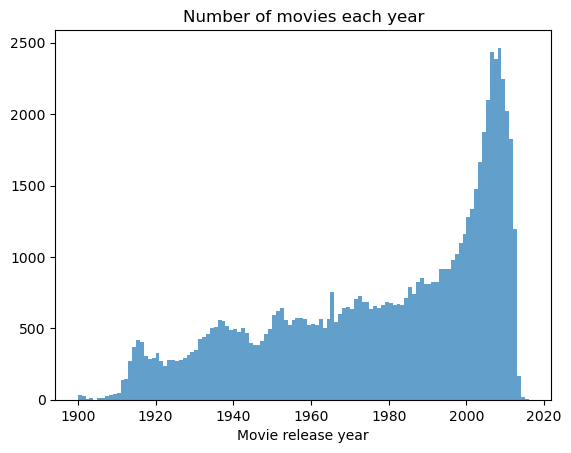

In [22]:
movie_md['release_year'] = movie_md['Movie release date'].apply(lambda x: int(str(x)[:4]) if str(x) != 'nan' else np.nan)

def release_date_hist(movie_df):
    movie_df = movie_df.dropna(subset=['release_year']).sort_values(by=['release_year'])
    movie_df = movie_df[movie_df['release_year'] >= 1900]
    movie_df = movie_df[movie_df['release_year'] <= 2017]
    plt.hist(movie_df['release_year'], bins=list(range(1900, 2017)), alpha=0.7)
    plt.xlabel('Movie release year')
    plt.title('Number of movies each year')


release_date_hist(movie_md)

recent_movies = movie_md[movie_md['release_year'] < 1900]
recent_movies.head(20)
len(recent_movies)

### Age at movie release by gender

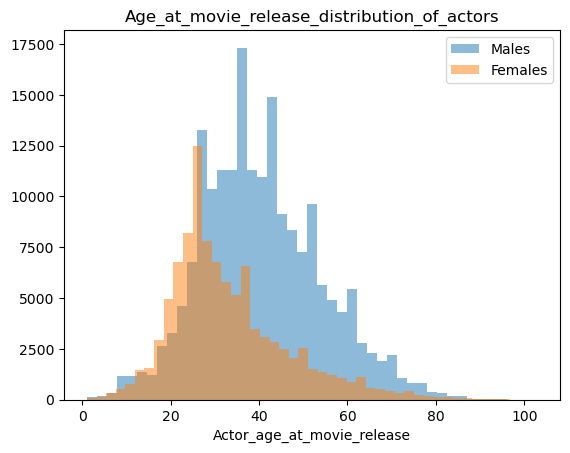

In [25]:
char_male= char_md[char_md['Actor_gender'] == 'M']
char_female = char_md[char_md['Actor_gender'] == 'F']


def age_hist(char_df):
    char_df = char_df.dropna(subset=['Actor_age_at_movie_release']).sort_values(by=['Actor_age_at_movie_release'])
    char_df = char_df[char_df['Actor_age_at_movie_release'] > 0]
    plt.hist(char_df['Actor_age_at_movie_release'], bins=45, alpha=0.5)
    plt.legend(['Males', 'Females'])
    plt.xlabel('Actor_age_at_movie_release')
    plt.title('Age_at_movie_release_distribution_of_actors')

age_hist(char_male)
age_hist(char_female)


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_release_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_(in_meters),Actor_ethnicity_(Freebase_ID),Actor_name,Actor_age_at_movie_release,Freebase_character/actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
